Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StanModels
using CmdStan, StanMCMCChain
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path_s("..", "scripts", "08")
cd(ProjDir)

### snippet 8.25

In [3]:
N = 100                                                    # individuals
height  = rand(Normal(10,2), N) ;              # sim total height of each
leg_prop = rand(Uniform(0.4,0.5), N);      # leg as proportion of height

sim left leg as proportion + error

In [4]:
leg_left = leg_prop .* height .+  rand(Normal( 0 , 0.02 ), N);

sim right leg as proportion + error

In [5]:
leg_right = leg_prop .* height .+  rand(Normal( 0 , 0.02 ), N);

combine into data frame

In [6]:
df =  DataFrame(height=height, leg_left = leg_left, leg_right = leg_right);

Show first 5 rows

In [7]:
first(df, 5)

,height,leg_left,leg_right
,Float64,Float64,Float64
1,5.06604,2.50225,2.46405
2,10.7952,4.64823,4.67992
3,8.71385,4.16358,4.16154
4,9.77787,4.03449,3.99493
5,7.22952,3.14375,3.1829


Define the Stan language model

In [8]:
m_5_8 = "
data{
    int N;
    real height[N];
    real leg_right[N];
    real leg_left[N];
}
parameters{
    real a;
    real bl;
    real br;
    real sigma;
}
model{
    vector[N] mu;
    sigma ~ cauchy( 0 , 1 );
    br ~ normal( 2 , 10 );
    bl ~ normal( 2 , 10 );
    a ~ normal( 10 , 100 );
    for ( i in 1:100 ) {
        mu[i] = a + bl * leg_left[i] + br * leg_right[i];
    }
    height ~ normal( mu , sigma );
}
";

Define the Stanmodel and set the output format to :mcmcchain.

In [9]:
stanmodel = Stanmodel(name="m_5_8", monitors = ["a", "br", "bl", "sigma"],
  model=m_5_8, output_format=:mcmcchain);
# Input data for cmdstan
m_8_8_data = Dict("N" => size(df, 1), "height" => df[:height],
    "leg_left" => df[:leg_left], "leg_right" => df[:leg_right]);
# Sample using cmdstan
rc, chn, cnames = stan(stanmodel, m_8_8_data, ProjDir, diagnostics=false,
  summary=false, CmdStanDir=CMDSTAN_HOME);
# Describe the draws
describe(chn)


File /Users/rob/.julia/dev/StanModels/scripts/08/tmp/m_5_8.stan will be updated.

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Empirical Posterior Estimates:
          Mean         SD       Naive SE       MCSE      ESS
    a  0.77254430 0.309360405 0.0048914175 0.0078434728 1000
   bl -0.08130107 2.090966471 0.0330610828 0.0571331801 1000
   br  2.12008196 2.082503469 0.0329272710 0.0564886829 1000
sigma  0.65029658 0.046502204 0.0007352644 0.0009768408 1000

Quantiles:
          2.5%       25.0%       50.0%      75.0%      97.5%  
    a  0.16439938  0.56838225  0.77174700 0.9773740 1.38833425
   bl -4.11817500 -1.48019750 -0.04710185 1.3357125 3.93430225
   br -1.90939225  0.69682675  2.07927000 3.5174450 6.13946900
sigma  0.56936005  0.61556250  0.64827050 0.6805175 0.75039775



Plot the density of posterior draws

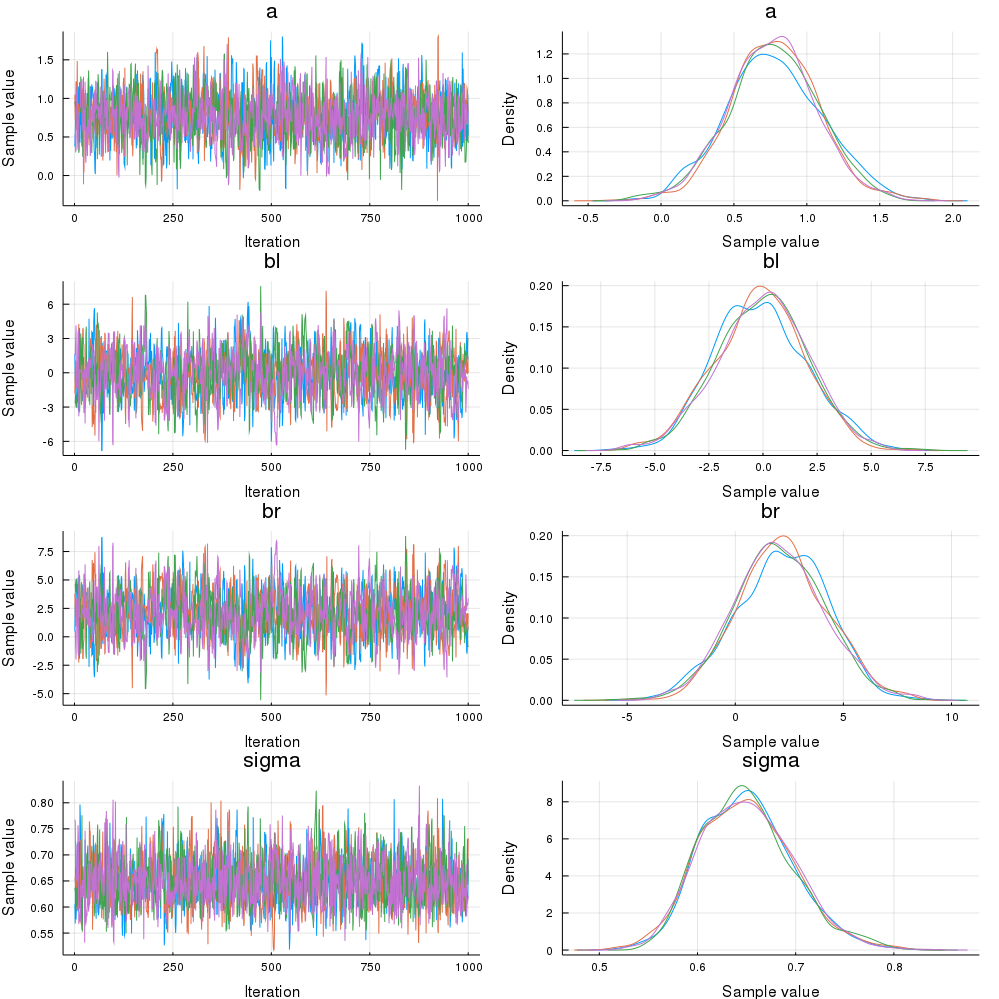

In [10]:
plot(chn)

Autocorrelation

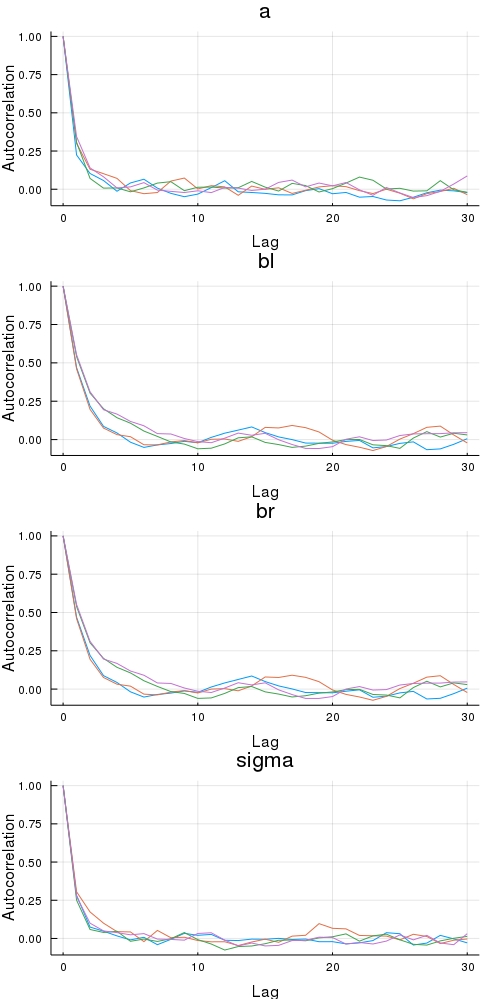

In [11]:
autocorplot(chn)

End of `08/m8.8s.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*